In [546]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [13]:
df1 = pd.read_csv('shopping_trends_updated.csv')

In [21]:
#Data Cleaning:
df1['Purchase Amount (USD)'] = pd.to_numeric(df1['Purchase Amount (USD)'], errors='coerce')
df = df1.dropna(subset=['Purchase Amount (USD)'])
print(df.head(10))
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing ages with median
df['Review Rating'] = df['Review Rating'].fillna(df['Review Rating'].mean())  # Fill missing ratings with mean
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].fillna(0)  # Fill missing purchase amount with 0
df['Promo Code Used'] = df['Promo Code Used'].fillna('No')  # Assume missing promo code as "No"

   Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse     Clothing                     53   
1            2   19   Male        Sweater     Clothing                     64   
2            3   50   Male          Jeans     Clothing                     73   
3            4   21   Male        Sandals     Footwear                     90   
4            5   45   Male         Blouse     Clothing                     49   
5            6   46   Male       Sneakers     Footwear                     20   
6            7   63   Male          Shirt     Clothing                     85   
7            8   27   Male         Shorts     Clothing                     34   
8            9   26   Male           Coat    Outerwear                     97   
9           10   57   Male        Handbag  Accessories                     31   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       G

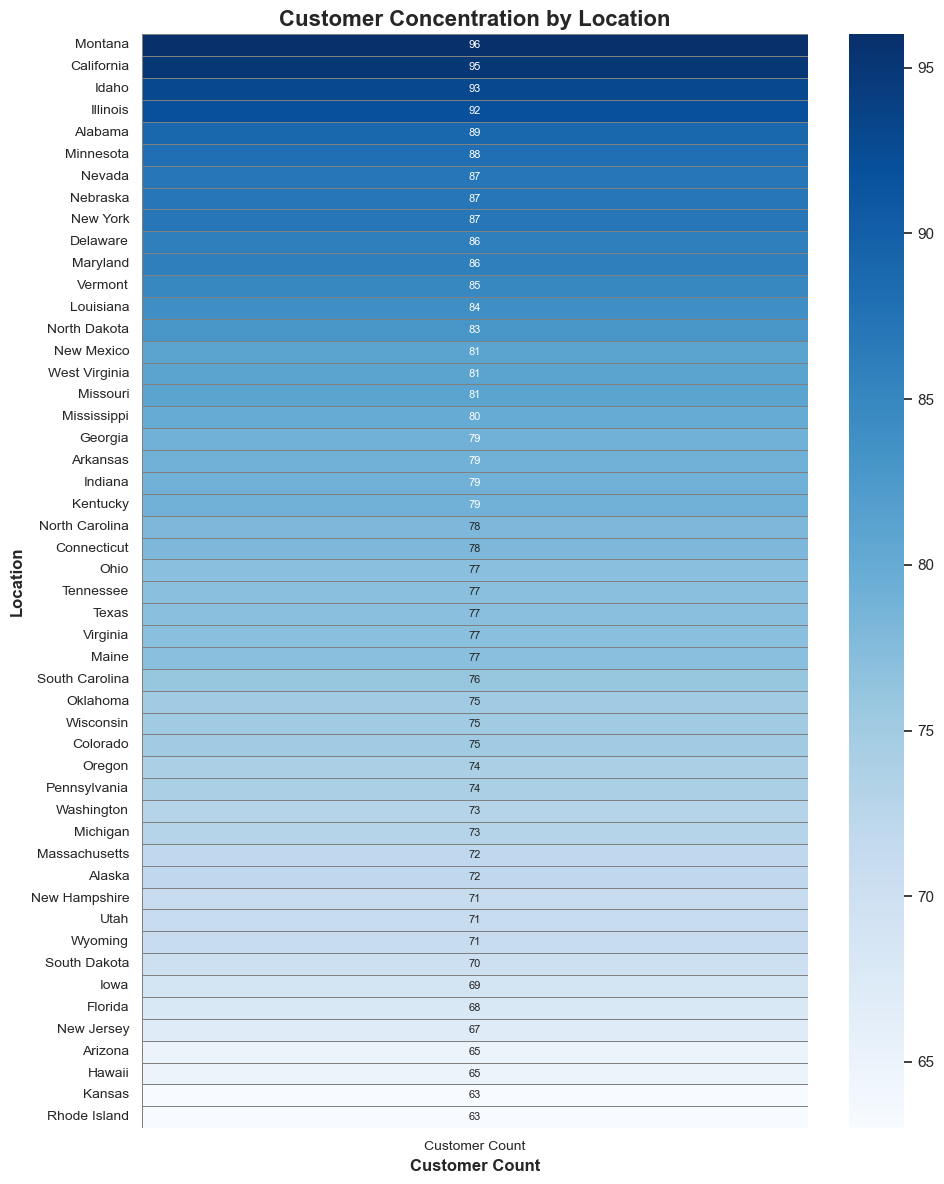

In [446]:
#Plot for concentration of customers by location

# Sort the customer counts for better readability
customer_counts_sorted = customer_counts.sort_values(by='Customer Count', ascending=False)

# Plot heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(
    customer_counts_sorted.set_index('Location'),
    cmap='Blues',
    annot=True,
    fmt='d',
    cbar=True,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={"size": 8})

plt.title('Customer Concentration by Location', fontsize=16, weight='bold')
plt.ylabel('Location', fontsize=12, weight='bold')
plt.xlabel('Customer Count', fontsize=12, weight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

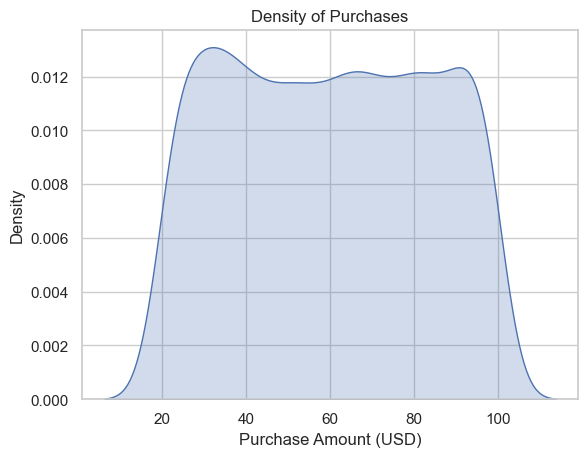

In [230]:
#Plot to find density of purchases based on purchase amount

sns.kdeplot(df_clean['Purchase Amount (USD)'], fill=True)
plt.title('Density of Purchases')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Density')
plt.show()

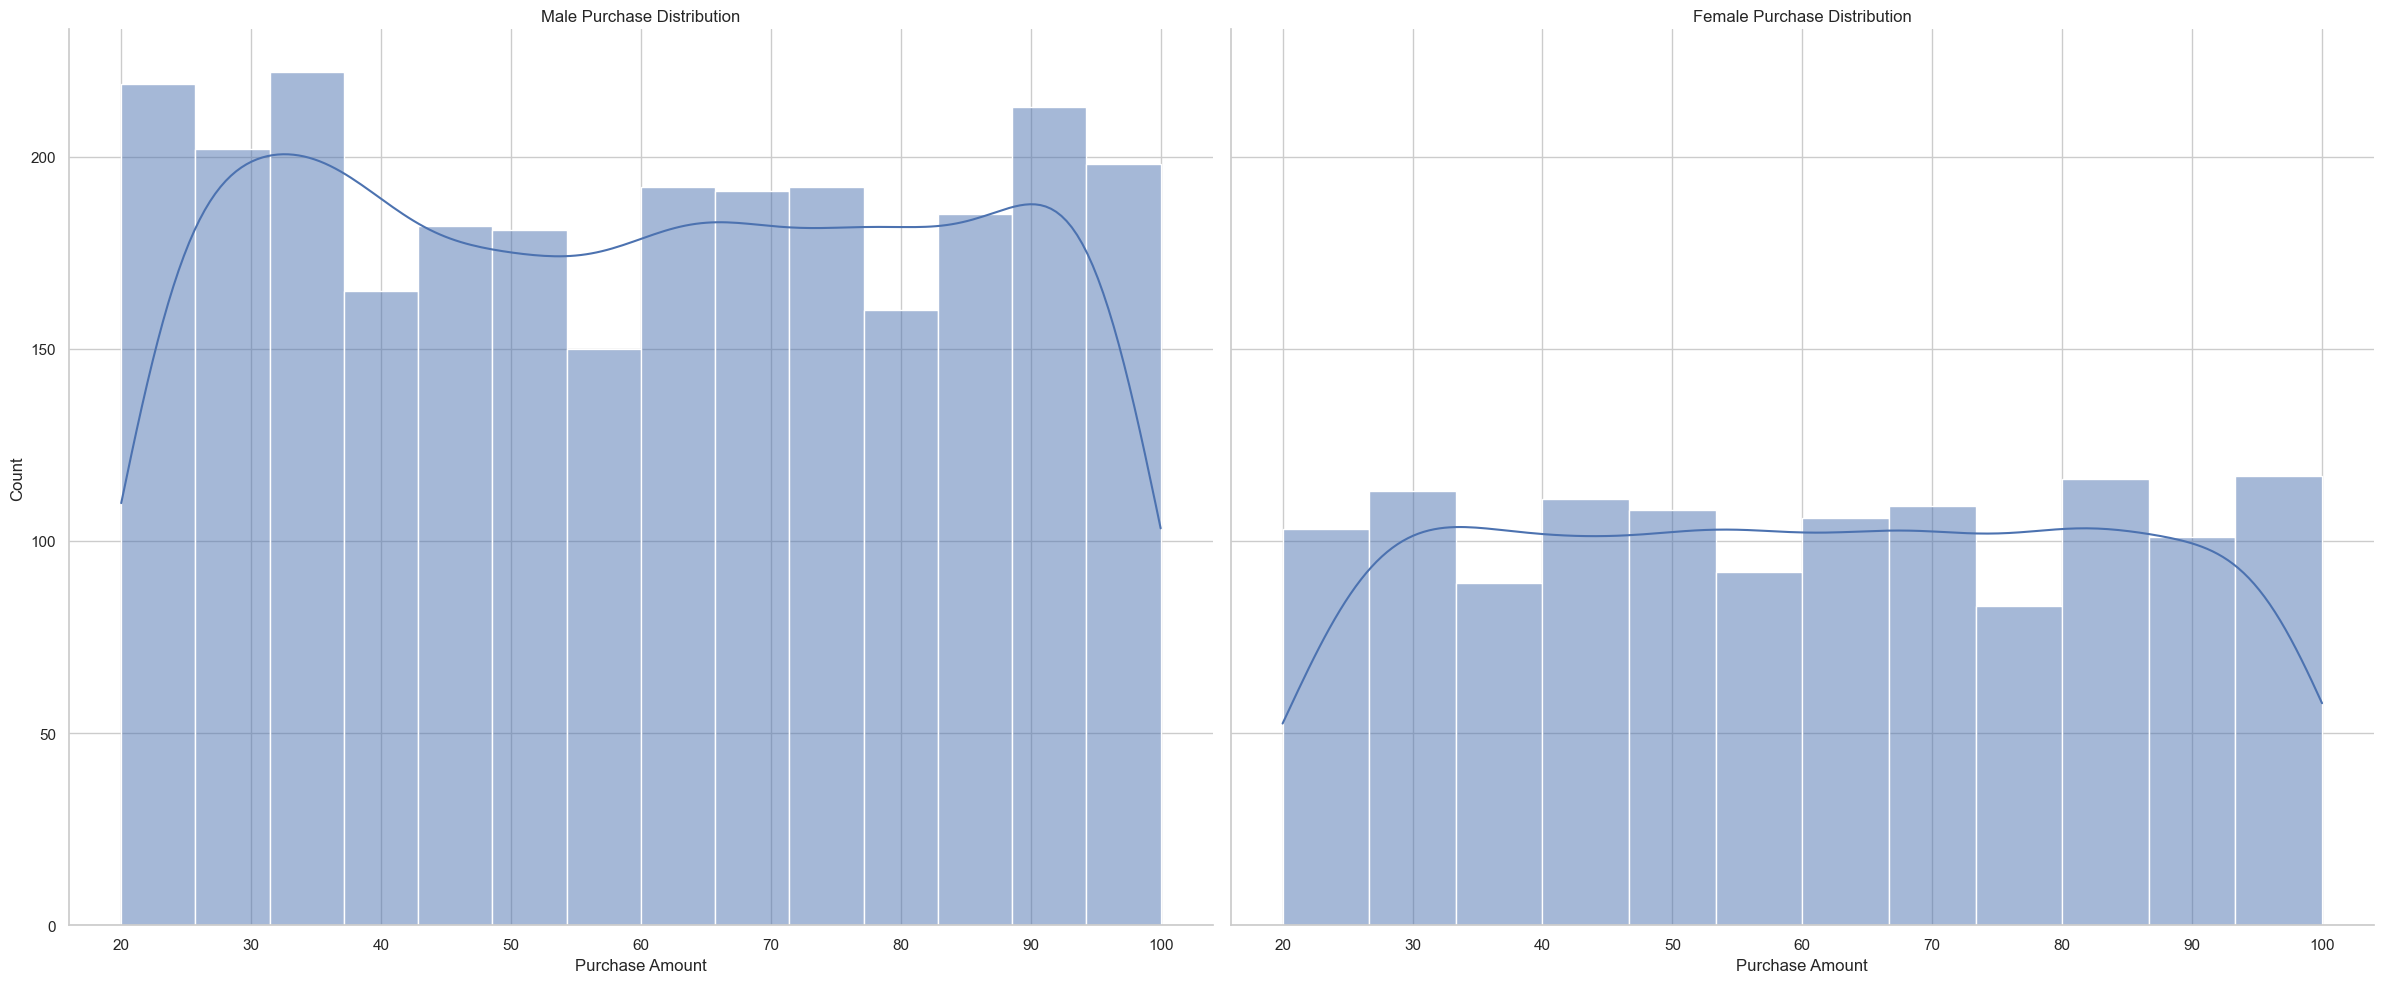

In [226]:
# Gender Distribution of Purchase Amount

sns.set_style('whitegrid')
g = sns.FacetGrid(df, col="Gender", height=10, aspect=1.2)
g.map(sns.histplot, "Purchase Amount (USD)", kde=True)
g.set_axis_labels("Purchase Amount", "Count")
g.set_titles("{col_name} Purchase Distribution")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8408\610122081.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_by_age = df.groupby('Age Group')['Purchase Amount (USD)'].agg(['sum', 'mean']).reset_index()


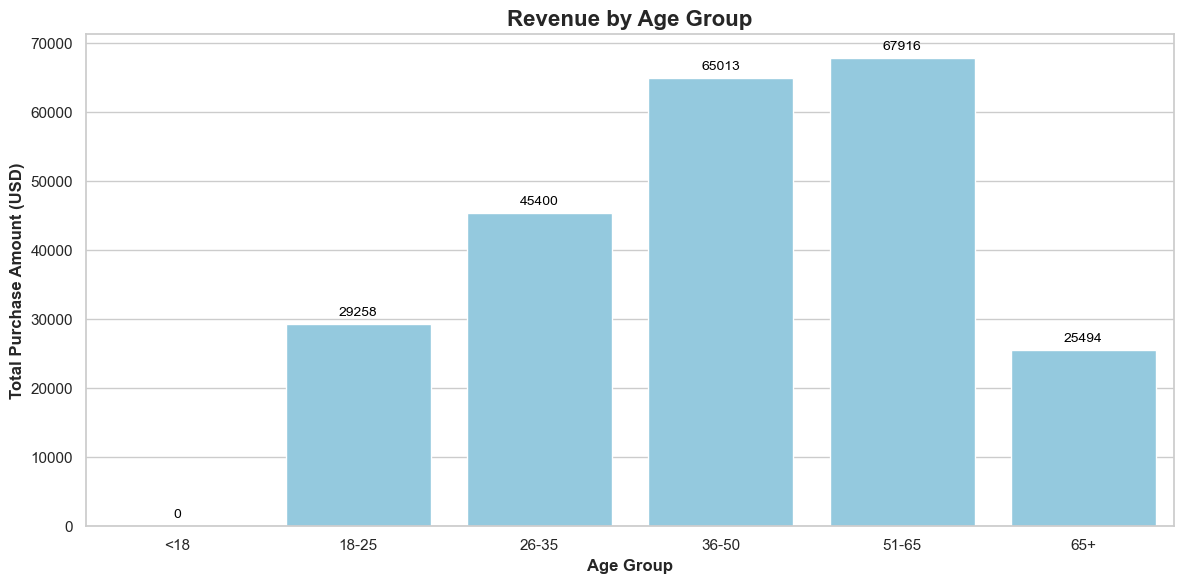

In [520]:
# Distribution of Revenue based on Age Group 

# Define age groups
bins = [0, 18, 25, 35, 50, 65, 100]  # Define ranges for age groups
labels = ['<18', '18-25', '26-35', '36-50', '51-65', '65+']  # Labels for the age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate total and average purchase amount
purchase_by_age = df.groupby('Age Group')['Purchase Amount (USD)'].agg(['sum', 'mean']).reset_index()

# Plotting using a barplot
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Barplot showing total purchase amount by age group
ax = sns.barplot(
    x='Age Group',
    y='sum',
    data=purchase_by_age,
    color='skyblue')
ax.set_title('Revenue by Age Group', fontsize=16, weight='bold')
ax.set_xlabel('Age Group', fontsize=12, weight='bold')
ax.set_ylabel('Total Purchase Amount (USD)', fontsize=12, weight='bold')

# Display values on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                textcoords='offset points')
plt.tight_layout()
plt.show()

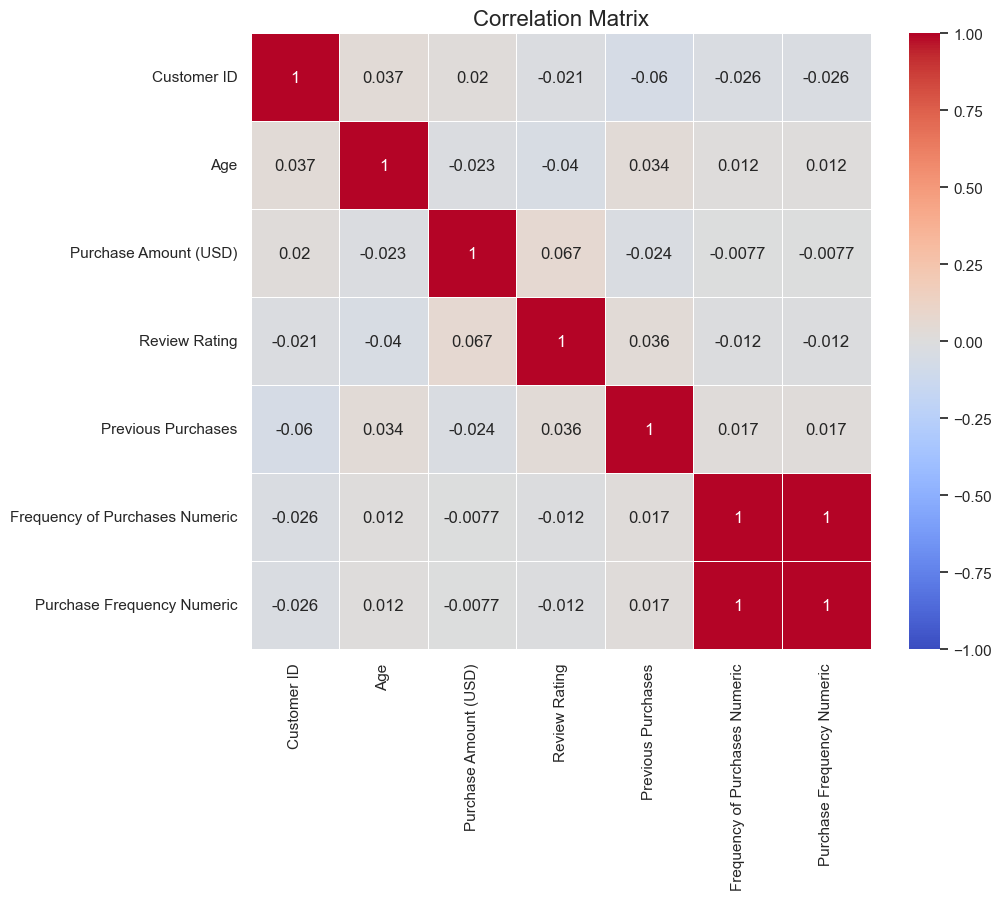

In [514]:
# Plotting a correlation matrix to identify relationships between variables

#Remove non-numeric columns
columns_to_exclude = ['CLV', 'APV', 'PF']
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Drop the columns that are not needed
numeric_df_cleaned = numeric_df.drop(columns=columns_to_exclude, errors='ignore')

# Handle missing values (drop rows/columns with NaN values or fill them)
numeric_df_cleaned = numeric_df_cleaned.dropna(axis=0, how='any')  # drop rows with NaN

# Calculate the correlation matrix
correlation_matrix = numeric_df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

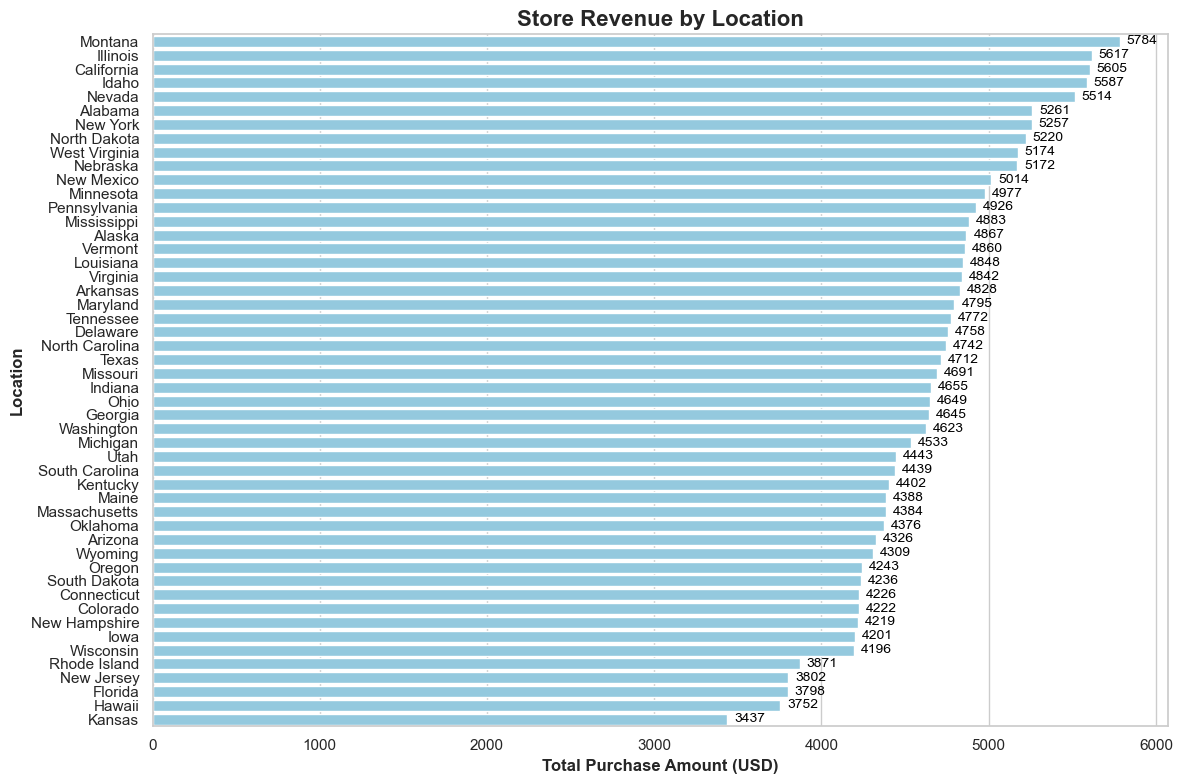

In [522]:
# Store Revenue by Location

# Group by Location and calculate total purchase amount
total_purchase_by_location = df.groupby('Location')['Purchase Amount (USD)'].sum().reset_index()
total_purchase_by_location.columns = ['Location', 'Total Purchase Amount']

# Sort the data for better visualization
total_purchase_by_location = total_purchase_by_location.sort_values(by='Total Purchase Amount', ascending=False)

# Plotting the total purchase amount by location
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Horizontal bar plot for total purchase amount
ax = sns.barplot(
    x='Total Purchase Amount',
    y='Location',
    data=total_purchase_by_location,
    color='skyblue')
ax.set_title('Store Revenue by Location', fontsize=16, weight='bold')
ax.set_xlabel('Total Purchase Amount (USD)', fontsize=12, weight='bold')
ax.set_ylabel('Location', fontsize=12, weight='bold')
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

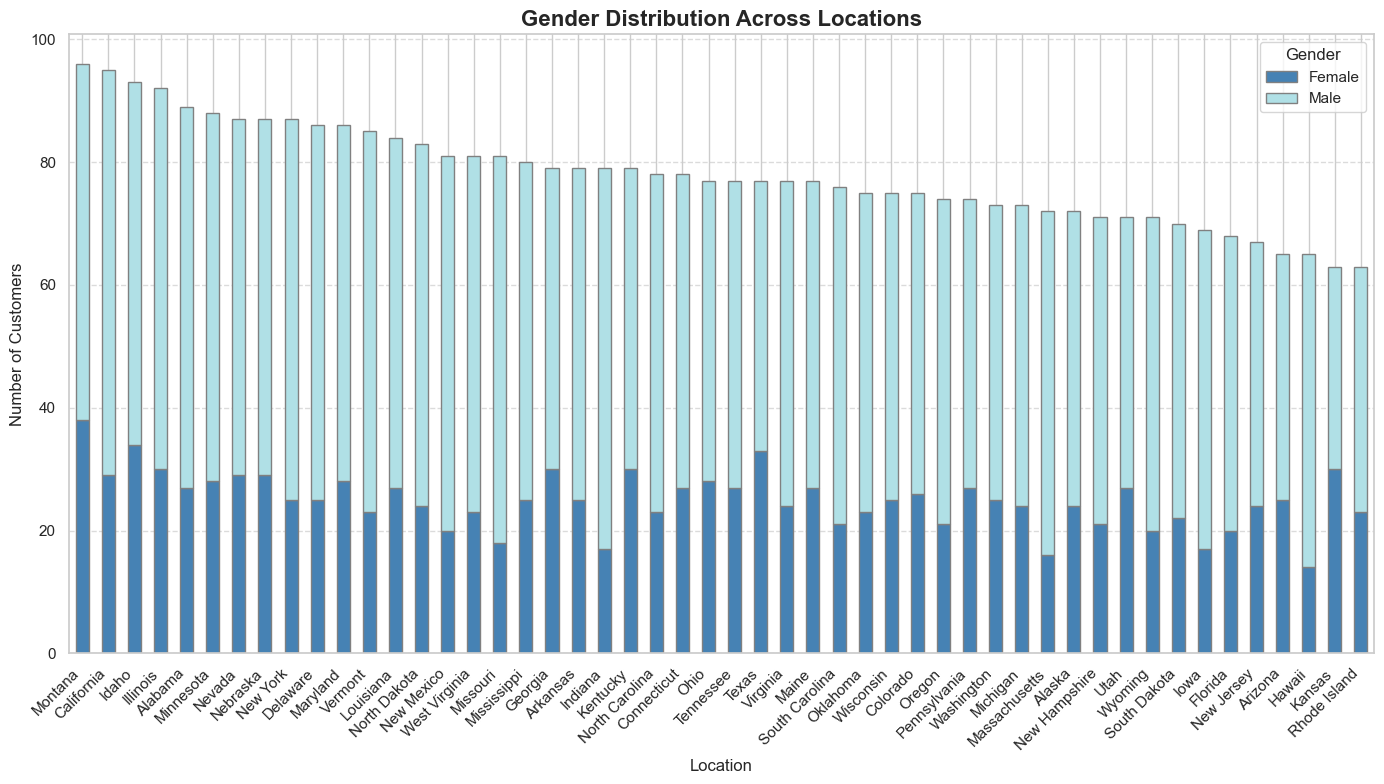

In [524]:
#Gender Distribution across locations

# Group by 'Location' and 'Gender' to count occurrences
gender_by_location = df.groupby(['Location', 'Gender']).size().reset_index(name='Count')

# Pivot the data for easier visualization
pivot_gender_by_location = gender_by_location.pivot(index='Location', columns='Gender', values='Count').fillna(0)

# Sort the rows by the total sum of each row (total number of customers per location)
pivot_gender_by_location = pivot_gender_by_location.loc[pivot_gender_by_location.sum(axis=1).sort_values(ascending=False).index]

# Plotting the data with custom colors (skyblue and powderblue)
plt.figure(figsize=(14, 8))
pivot_gender_by_location.plot(kind='bar', stacked=True, color=['steelblue', 'powderblue'], figsize=(14, 8), edgecolor='gray')
plt.title('Gender Distribution Across Locations', fontsize=16, weight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8408\3700092166.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_by_location = df.groupby(['Location', 'Age Group']).size().reset_index(name='Count')


<Figure size 1400x800 with 0 Axes>

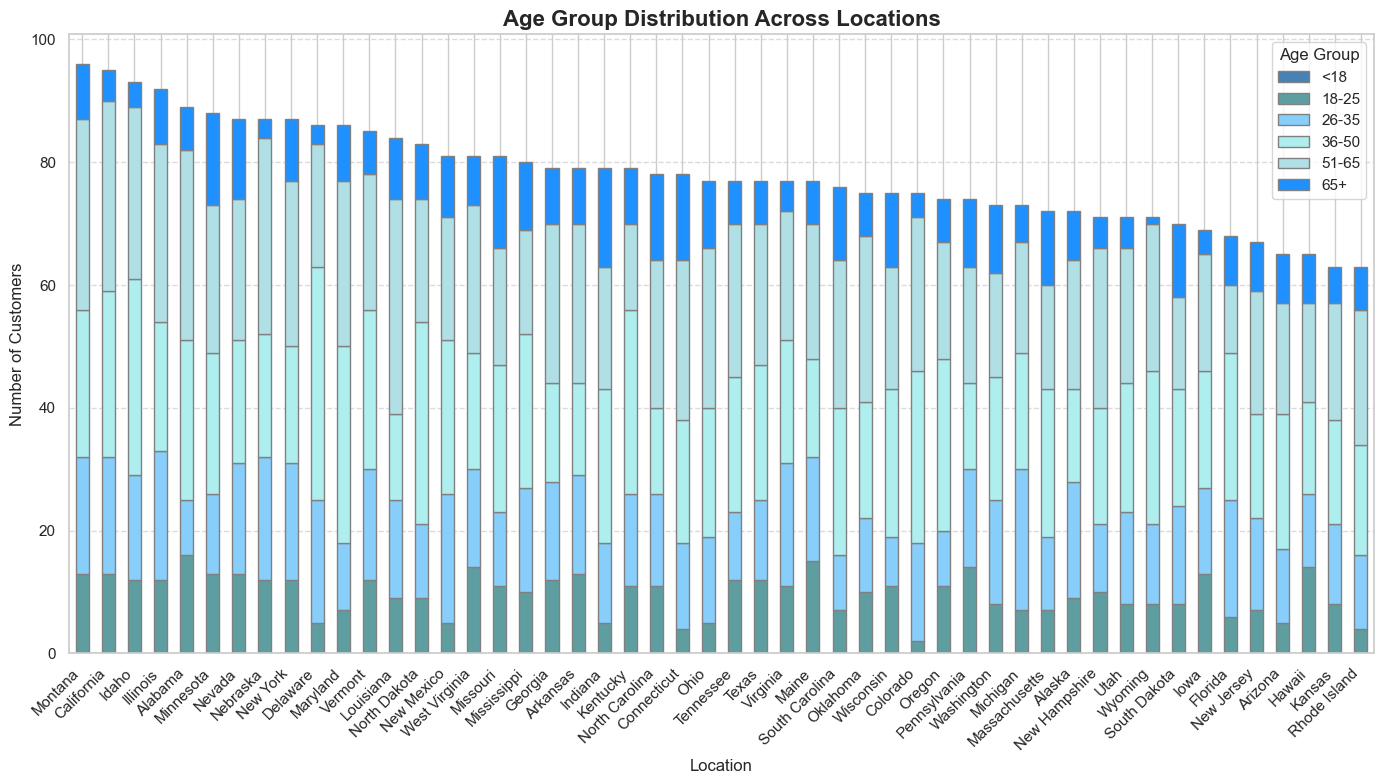

In [526]:
# Age Distribution across locations

# Group by 'Location' and 'Age Group' to count occurrences
age_group_by_location = df.groupby(['Location', 'Age Group']).size().reset_index(name='Count')

# Pivot the data for easier visualization
pivot_age_group_by_location = age_group_by_location.pivot(index='Location', columns='Age Group', values='Count').fillna(0)

# Sort the rows by the total sum of each row (total number of customers per location)
pivot_age_group_by_location = pivot_age_group_by_location.loc[pivot_age_group_by_location.sum(axis=1).sort_values(ascending=False).index]

# Define the custom color palette (darker colors at the bottom)
colors = ['steelblue', 'cadetblue', 'lightskyblue', 'paleturquoise', 'powderblue', 'dodgerblue']

# Plotting the data with the custom color palette
plt.figure(figsize=(14, 8))
pivot_age_group_by_location.plot(kind='bar', stacked=True, color=colors[:pivot_age_group_by_location.shape[1]], figsize=(14, 8), edgecolor='gray')
plt.title('Age Group Distribution Across Locations', fontsize=16, weight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

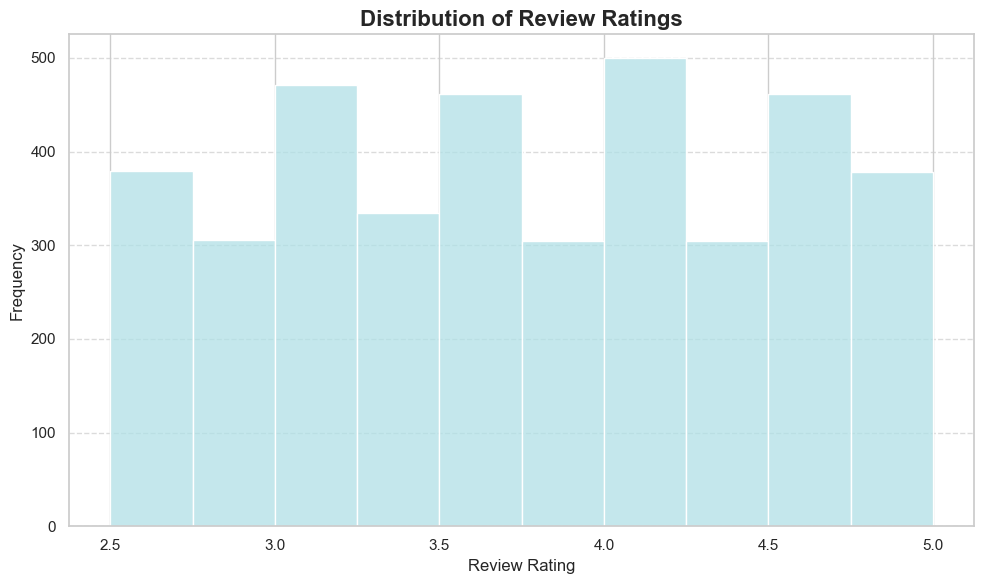

In [516]:
# Plotting the histogram for review ratings

plt.figure(figsize=(10, 6))
sns.histplot(df['Review Rating'], bins=10, kde=False, color='powderblue')
plt.title('Distribution of Review Ratings', fontsize=16, weight='bold')
plt.xlabel('Review Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

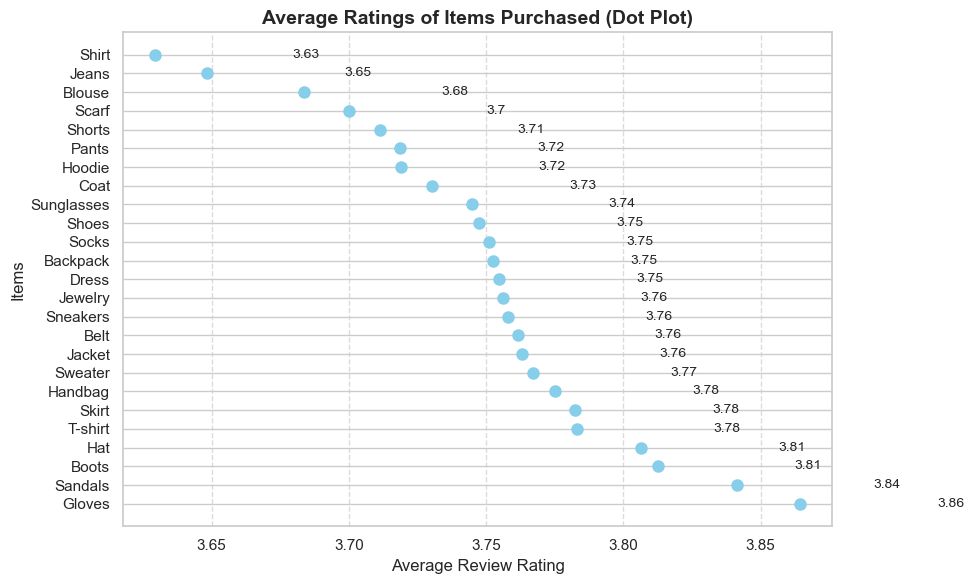

In [528]:
# Sort the items by average ratings

avg_ratings_sorted = avg_ratings.sort_values(by='Review Rating', ascending=False)

# Plotting a dot plot
plt.figure(figsize=(10, 6))
plt.plot(avg_ratings_sorted['Review Rating'], avg_ratings_sorted['Item Purchased'], 'o', color='skyblue', markersize=8)
plt.title('Average Ratings of Items Purchased (Dot Plot)', fontsize=14, weight='bold')
plt.xlabel('Average Review Rating', fontsize=12)
plt.ylabel('Items', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, rating in enumerate(avg_ratings_sorted['Review Rating']):
    plt.text(rating + 0.05, i, round(rating, 2), va='center', fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8408\2987581653.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clv_by_age_group = df.groupby('Age Group')['CLV'].mean()


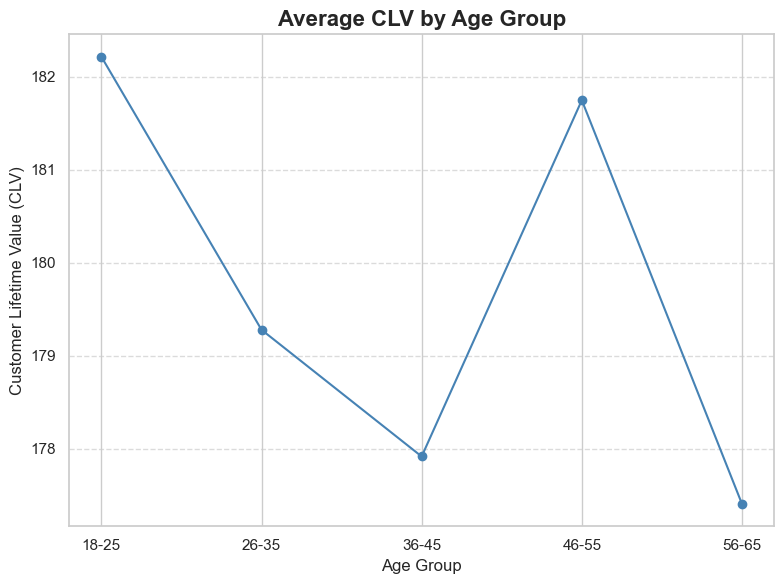

In [440]:
# Group by 'Age Group' and calculate average CLV (CLV = Total Purchase Amount * Purchase Frequency)

# Calculate Average Purchase Value (APV)
df['APV'] = df.groupby('Customer ID')['Purchase Amount (USD)'].transform('mean')

# Estimate Purchase Frequency (PF)
df['PF'] = df.groupby('Customer ID')['Purchase Amount (USD)'].transform('count')

# Assume a fixed lifespan proxy (e.g., years or total number of purchases)
customer_lifespan = 3  # Example: Assume an average customer stays for 3 years

# Calculate CLV
df['CLV'] = df['APV'] * df['PF'] * customer_lifespan
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
clv_by_age_group = df.groupby('Age Group')['CLV'].mean()

# Plot the line graph
plt.figure(figsize=(8, 6))
plt.plot(clv_by_age_group.index, clv_by_age_group.values, marker='o', linestyle='-', color='steelblue')
plt.title('Average CLV by Age Group', fontsize=16, weight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Customer Lifetime Value (CLV)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

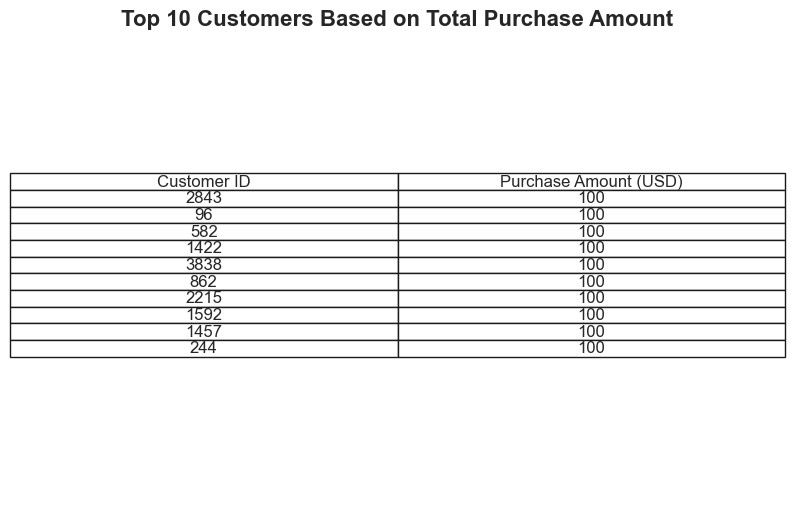

In [536]:
# Top 10 customers based on total purchase amount

#Group by 'Customer ID' and calculate the total purchase amount for each customer
customer_total_purchase = df.groupby('Customer ID')['Purchase Amount (USD)'].sum().reset_index()

#Sort the customers by total purchase amount in descending order and select the top 10
top_10_customers = customer_total_purchase.sort_values(by='Purchase Amount (USD)', ascending=False).head(10)

#Display the top 10 customers in a table format
import matplotlib.pyplot as plt

# Create a figure to display the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Create the table and display it
table = ax.table(cellText=top_10_customers.values, colLabels=top_10_customers.columns, loc='center', cellLoc='center')
plt.title('Top 10 Customers Based on Total Purchase Amount', fontsize=16, weight='bold')
plt.show()

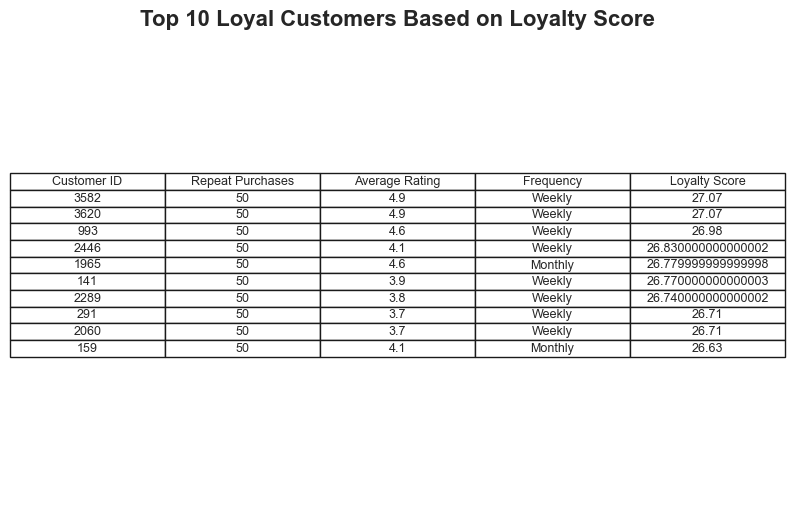

In [538]:
#To identify the most loyal customers, we can create a loyalty score based on:

#Repeat Purchases: The number of times a customer has made a purchase.
#Average Review Rating: Higher ratings indicate greater loyalty.
#Frequency of Purchases: Weight customers who purchase more frequently.

# Calculate loyalty components
df_loyalty = df.groupby('Customer ID').agg(
    Repeat_Purchases=('Previous Purchases', 'sum'),
    Average_Rating=('Review Rating', 'mean'),
    Frequency=('Frequency of Purchases', lambda x: x.value_counts().idxmax())
).reset_index()

# Map frequency to numeric scores (higher weight for higher frequency)
frequency_mapping = {'Weekly': 3, 'Monthly': 2, 'Yearly': 1}
df_loyalty['Frequency_Score'] = df_loyalty['Frequency'].map(frequency_mapping)

# Calculate overall loyalty score (assigning weights)
df_loyalty['Loyalty_Score'] = (
    (df_loyalty['Repeat_Purchases'] * 0.5) + 
    (df_loyalty['Average_Rating'] * 0.3) + 
    (df_loyalty['Frequency_Score'] * 0.2)
)

# Sort by loyalty score and select top 10
top_loyal_customers = df_loyalty.sort_values(by='Loyalty_Score', ascending=False).head(10)

# Display as a clean table using pandas Styler
styled_table = top_loyal_customers[['Customer ID', 'Repeat_Purchases', 'Average_Rating', 'Frequency', 'Loyalty_Score']] \
    .style.set_table_attributes('style="width: 100%; border-collapse: collapse;"') \
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('padding', '8px'), ('text-align', 'center')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]}
    ])

# Display the styled table
styled_table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=top_loyal_customers[['Customer ID', 'Repeat_Purchases', 'Average_Rating', 'Frequency', 'Loyalty_Score']].values,
                colLabels=['Customer ID', 'Repeat Purchases', 'Average Rating', 'Frequency', 'Loyalty Score'],
                loc='center', cellLoc='center')
plt.title('Top 10 Loyal Customers Based on Loyalty Score', fontsize=16, weight='bold')
plt.show()

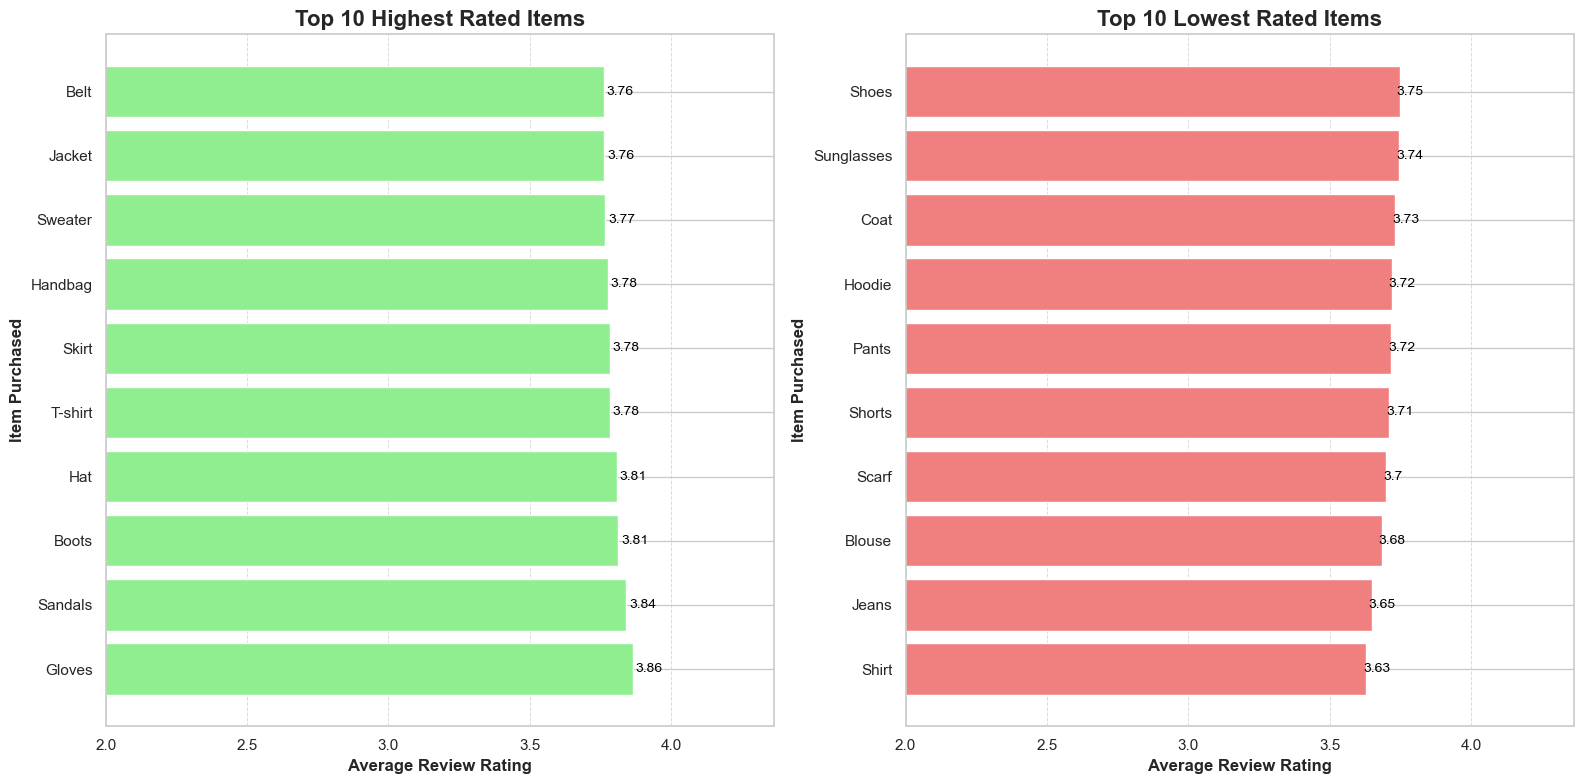

In [464]:
# Top 10 highest rated items based on customer ratings 

# Calculate the average rating for each item
item_avg_ratings = df.groupby('Item Purchased')['Review Rating'].mean().reset_index()

# Sort the items by 'Review Rating' in descending order for the highest-rated and ascending for the lowest-rated
highest_rated = item_avg_ratings.sort_values(by='Review Rating', ascending=False).head(10)
lowest_rated = item_avg_ratings.sort_values(by='Review Rating', ascending=True).head(10)

# Plotting the bar chart for both highest and lowest rated items
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top 10 highest rated items
axes[0].barh(highest_rated['Item Purchased'], highest_rated['Review Rating'], color='lightgreen')
axes[0].set_title('Top 10 Highest Rated Items', fontsize=16, weight='bold')
axes[0].set_xlabel('Average Review Rating', fontsize=12, weight='bold')
axes[0].set_ylabel('Item Purchased', fontsize=12, weight='bold')
axes[0].set_xlim(2, highest_rated['Review Rating'].max() + 0.5)  # Set x-axis scale

# Write the rating values on top of each bar
for index, value in enumerate(highest_rated['Review Rating']):
    axes[0].text(value + 0.01, index, round(value, 2), va='center', fontsize=10, color='black')

# Top 10 lowest rated items
axes[1].barh(lowest_rated['Item Purchased'], lowest_rated['Review Rating'], color='lightcoral')
axes[1].set_title('Top 10 Lowest Rated Items', fontsize=16, weight='bold')
axes[1].set_xlabel('Average Review Rating', fontsize=12, weight='bold')
axes[1].set_ylabel('Item Purchased', fontsize=12, weight='bold')
axes[1].set_xlim(2, highest_rated['Review Rating'].max() + 0.5)  # Set x-axis scale

# Write the rating values on top of each bar
for index, value in enumerate(lowest_rated['Review Rating']):
    axes[1].text(value - 0.01, index, round(value, 2), va='center', fontsize=10, color='black')
for ax in axes:
    ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

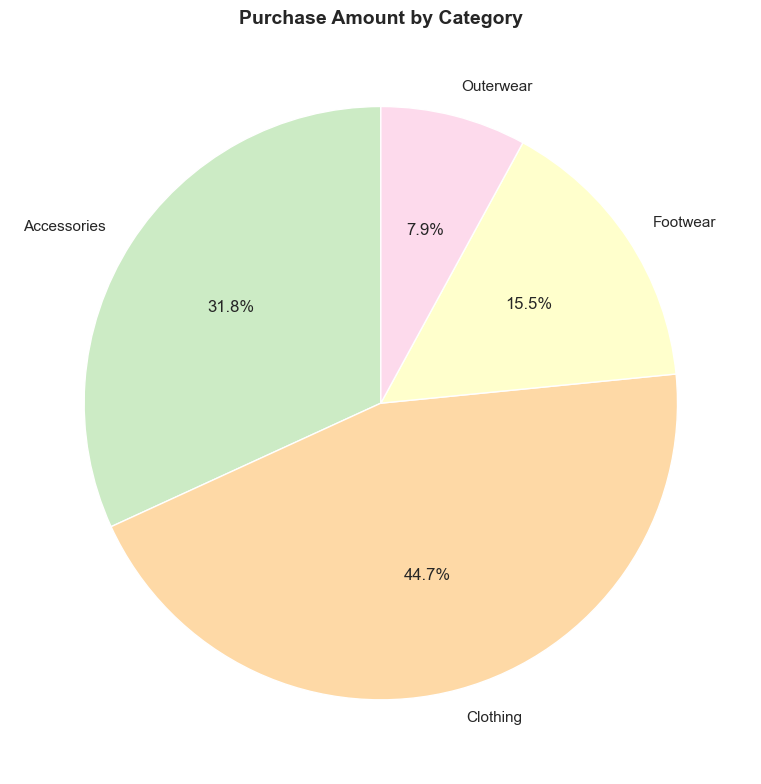

In [454]:
# Calculate total purchase amount for each category

purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
colors = plt.cm.Pastel1(np.linspace(0.3, 0.8, len(purchase_by_category)))

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    purchase_by_category,
    labels=purchase_by_category.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'})
plt.title('Purchase Amount by Category', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

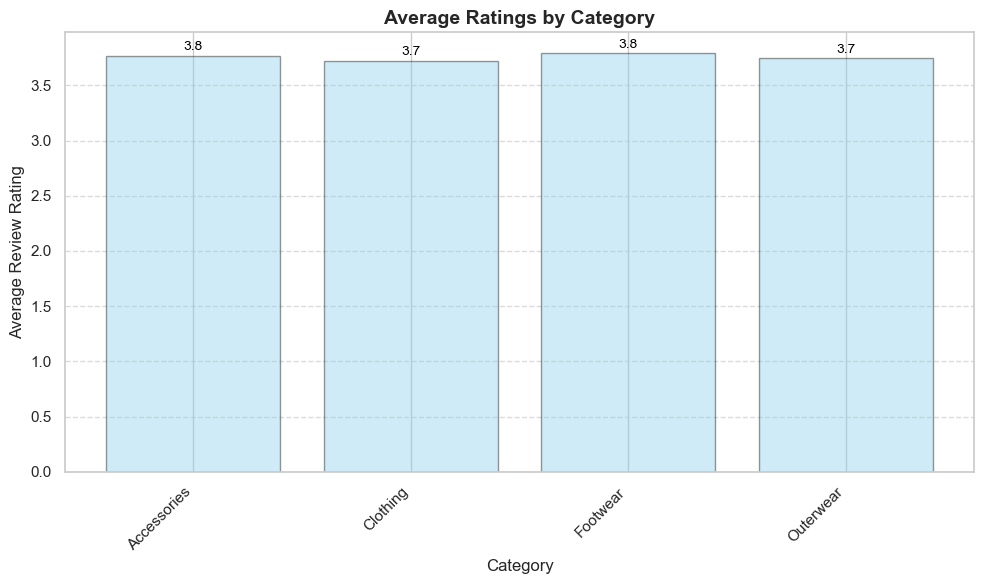

In [460]:
# Calculate average ratings for each category

avg_ratings_by_category = df.groupby('Category')['Review Rating'].mean()
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(avg_ratings_by_category.index, avg_ratings_by_category.values, color='skyblue', edgecolor='black', alpha=0.4)
plt.title('Average Ratings by Category', fontsize=14, weight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Review Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate the bars with ratings
for index, value in enumerate(avg_ratings_by_category):
    plt.text(index, value + 0.05, f"{value:.1f}", ha='center', fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8408\3189955260.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Purchase Amount (USD)', y='Category', data=high_performing.head(5), palette='Greens')


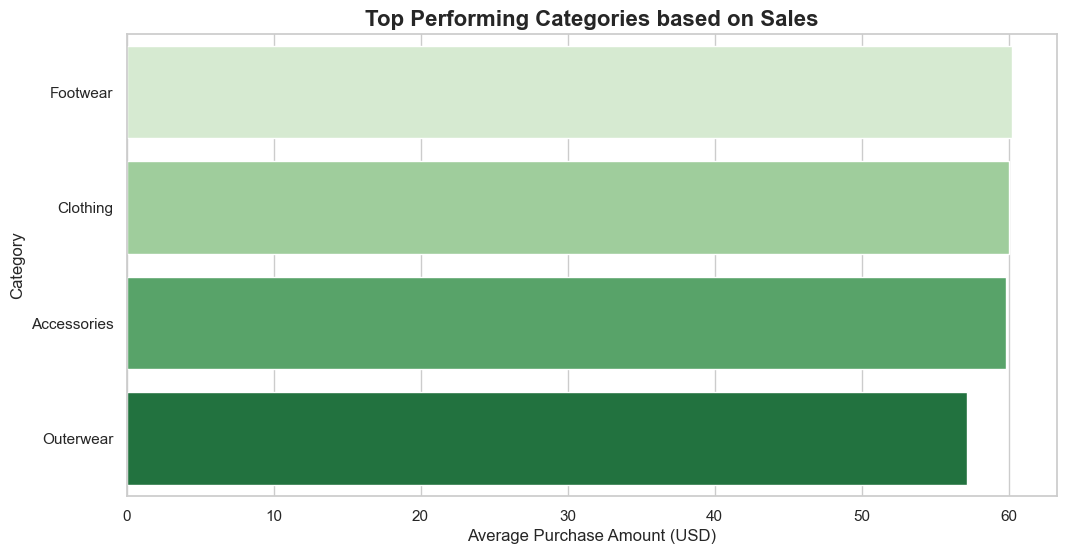

In [542]:
# Identify High and Low Performing Categories

# Group by category and calculate average purchase amount and ratings
category_performance = df.groupby('Category').agg({
    'Purchase Amount (USD)': 'mean',
    'Review Rating': 'mean'
}).reset_index()

# Sort by purchase amount
high_performing = category_performance.sort_values(by='Purchase Amount (USD)', ascending=False)
low_performing = category_performance.sort_values(by='Purchase Amount (USD)', ascending=True)

# Plot high-performing categories
plt.figure(figsize=(12, 6))
sns.barplot(x='Purchase Amount (USD)', y='Category', data=high_performing.head(5), palette='Greens')
plt.title('Top Performing Categories based on Sales', fontsize=16, weight='bold')
plt.xlabel('Average Purchase Amount (USD)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

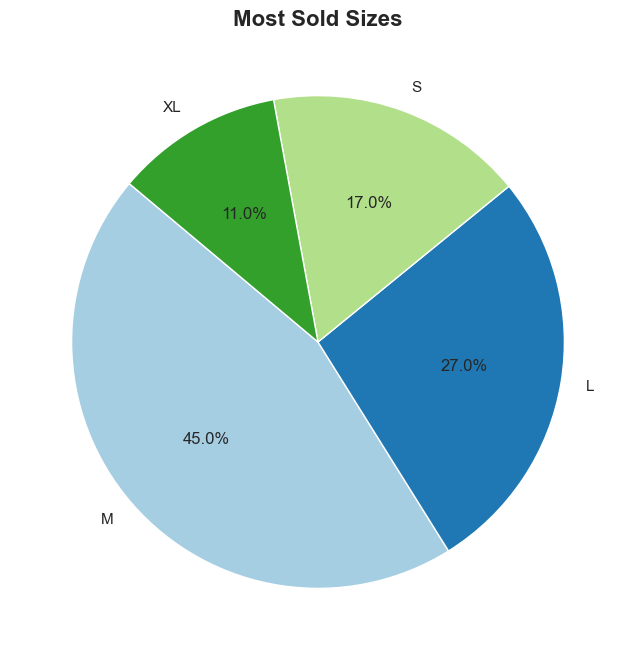

In [484]:
# As Clothing is a popular category, find most purchased sizes

# Group by Size and count the occurrences
size_distribution = df['Size'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    size_distribution, 
    labels=size_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors)
plt.title('Most Sold Sizes', fontsize=16, weight='bold')
plt.show()

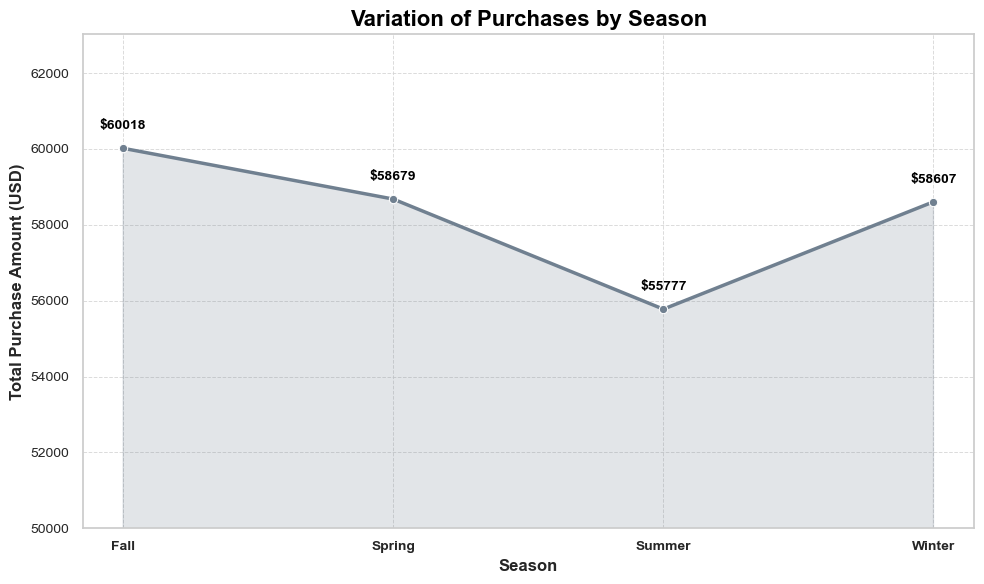

In [530]:
# Variation of Purchases by Season

# Grouping data by season and summing the purchase amounts
seasonal_data = df.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=seasonal_data,
    x='Season',
    y='Purchase Amount (USD)',
    marker='o',
    color='slategray',  # Subtle and elegant color
    linewidth=2.5)

# Shading the area below the line
plt.fill_between(
    seasonal_data['Season'], 
    seasonal_data['Purchase Amount (USD)'], 
    color='slategray', 
    alpha=0.2)

# Adding sales numbers as data labels
for i, row in seasonal_data.iterrows():
    plt.text(
        x=row['Season'],
        y=row['Purchase Amount (USD)'] + 500,  # Offset for readability
        s=f"${int(row['Purchase Amount (USD)'])}", 
        color='black', 
        fontsize=10, 
        weight='bold', 
        ha='center')

# Adding grid and styling
plt.grid(color='lightgray', linestyle='--', linewidth=0.7, alpha=0.8)
plt.title('Variation of Purchases by Season', fontsize=16, weight='bold', color='black')
plt.xlabel('Season', fontsize=12, weight='bold')
plt.ylabel('Total Purchase Amount (USD)', fontsize=12, weight='bold')

# Set the Y-axis to start from 50,000
plt.ylim(bottom=50000)
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

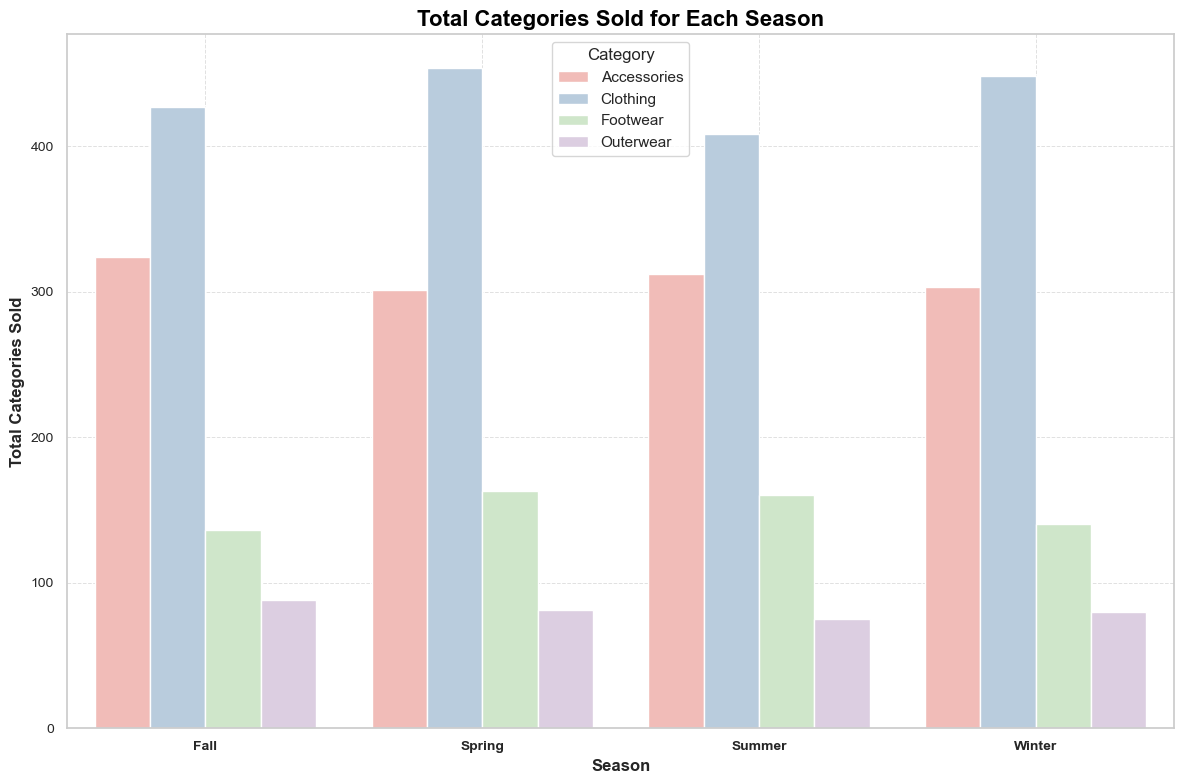

In [145]:
# Categories sold for each season

# Grouping data by Season and Category to get total categories sold
category_sales_by_season = df.groupby(['Season', 'Category']).size().reset_index(name='Sales Count')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Season',
    y='Sales Count',
    hue='Category',
    data=category_sales_by_season,
    palette='Pastel1',  # Light, pastel color palette
    errorbar=None  # No confidence intervals)

plt.title('Total Categories Sold for Each Season', fontsize=16, weight='bold', color='black')
plt.xlabel('Season', fontsize=12, weight='bold')
plt.ylabel('Total Categories Sold', fontsize=12, weight='bold')
plt.grid(color='lightgray', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

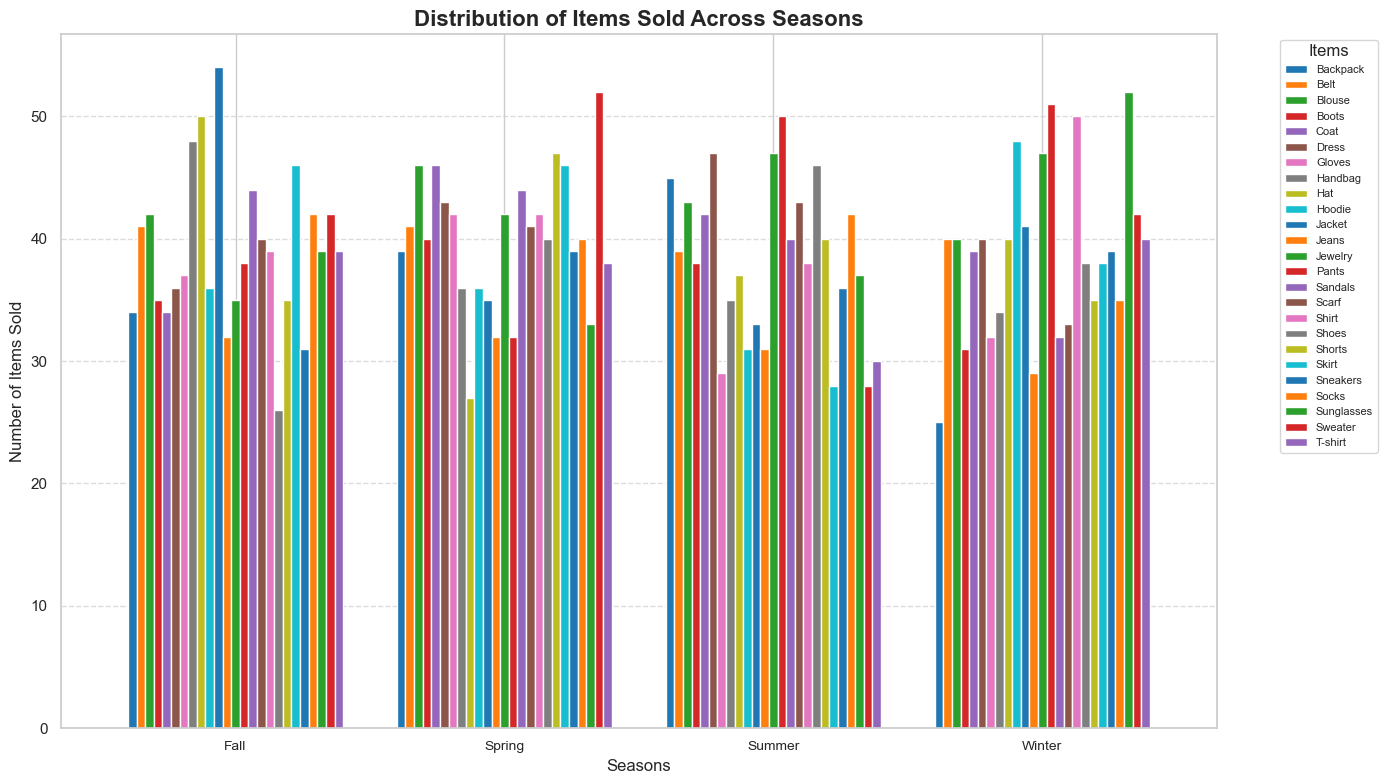

In [532]:
# Distribution of items sold across seasons

# Grouping the data to find the count of items sold for each season
items_season = df.groupby(['Season', 'Item Purchased']).size().unstack(fill_value=0)

# Setting a color palette with distinguishable colors
colors = sns.color_palette("tab10", n_colors=items_season.shape[1])
items_season.plot(kind='bar', figsize=(14, 8), color=colors, width=0.8)
plt.title('Distribution of Items Sold Across Seasons', fontsize=16, weight='bold')
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Number of Items Sold', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Items', fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

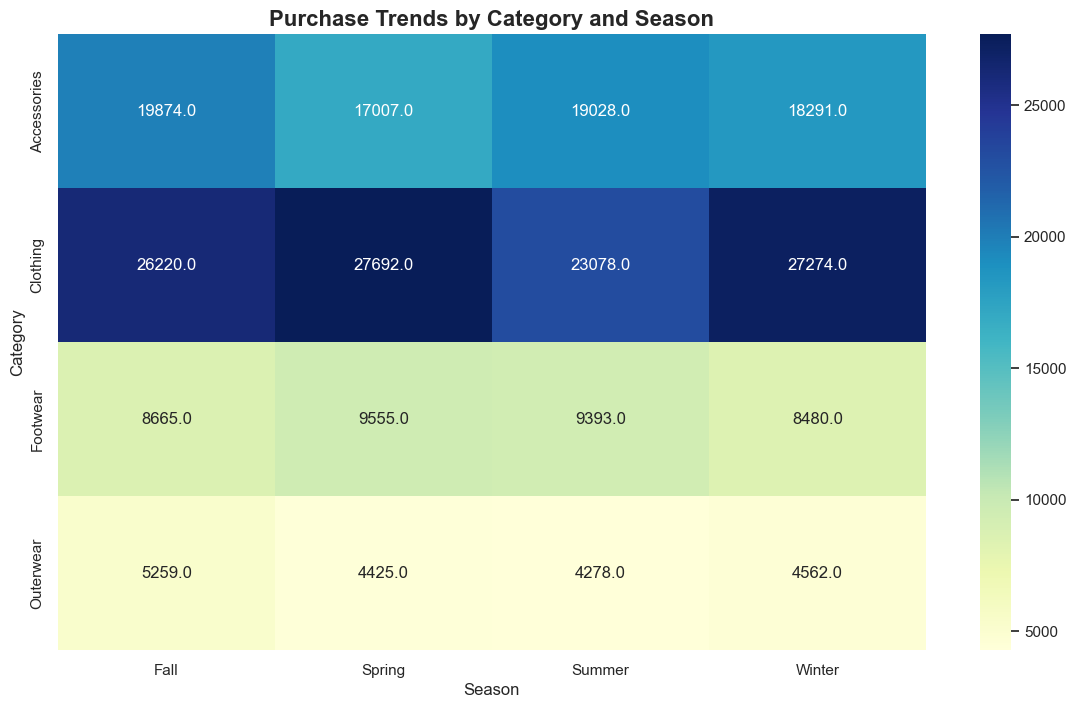

In [428]:
# Purchase trends by category and season

# Group data by Category and Season, calculate total purchase amounts
category_season_trends = df.groupby(['Category', 'Season'])['Purchase Amount (USD)'].sum().unstack()

# Plot the heatmap for trends
plt.figure(figsize=(14, 8))
sns.heatmap(category_season_trends, annot=True, fmt=".1f", cmap='YlGnBu', cbar=True)
plt.title('Purchase Trends by Category and Season', fontsize=16, weight='bold')
plt.ylabel('Category', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.show()

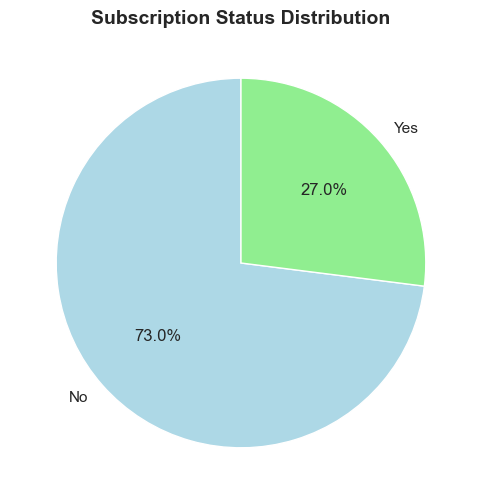

In [466]:
# Distribution of Subscription Status

# Count the number of occurrences of each subscription status
subscription_counts = df['Subscription Status'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6, 6))
subscription_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Subscription Status Distribution', fontsize=14, weight='bold')
plt.ylabel('')
plt.show()

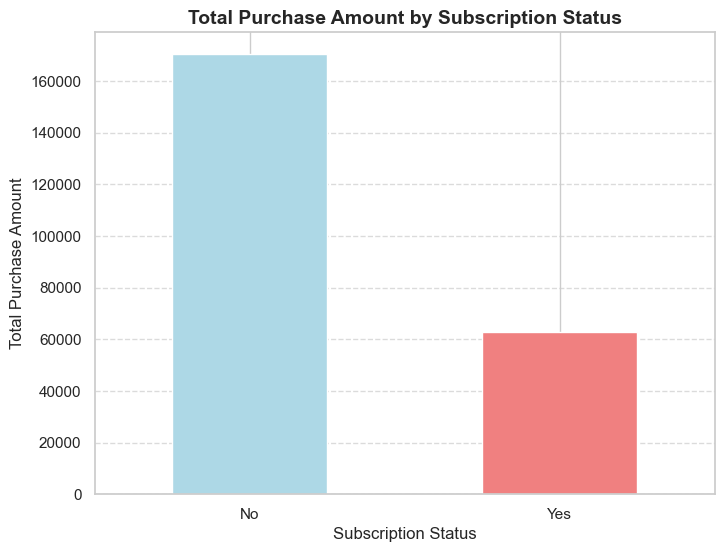

In [470]:
# Purchase amount by subscription status

# Group by 'Subscription Status' and calculate total purchase amount for each group
purchase_by_subscription = df.groupby('Subscription Status')['Purchase Amount (USD)'].sum()

# Plotting the bar chart
purchase_by_subscription.plot(kind='bar', color=['lightblue', 'lightcoral'], figsize=(8, 6))
plt.title('Total Purchase Amount by Subscription Status', fontsize=14, weight='bold')
plt.xlabel('Subscription Status', fontsize=12)
plt.ylabel('Total Purchase Amount', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

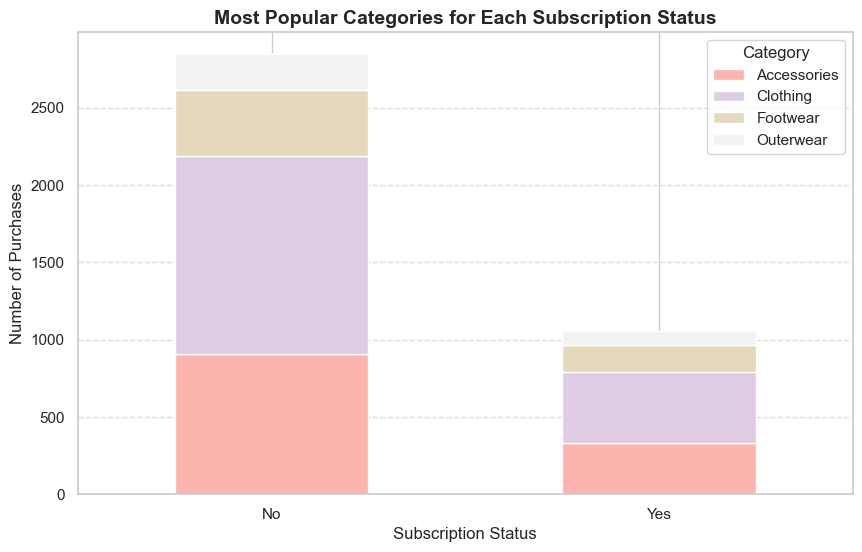

In [474]:
# Most popular categories for each subscription status

# Group by 'Subscription Status' and 'Category' and get the count of purchases for each combination
category_by_subscription = df.groupby(['Subscription Status', 'Category']).size().unstack()

# Plotting a stacked bar chart
category_by_subscription.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')
plt.title('Most Popular Categories for Each Subscription Status', fontsize=14, weight='bold')
plt.xlabel('Subscription Status', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

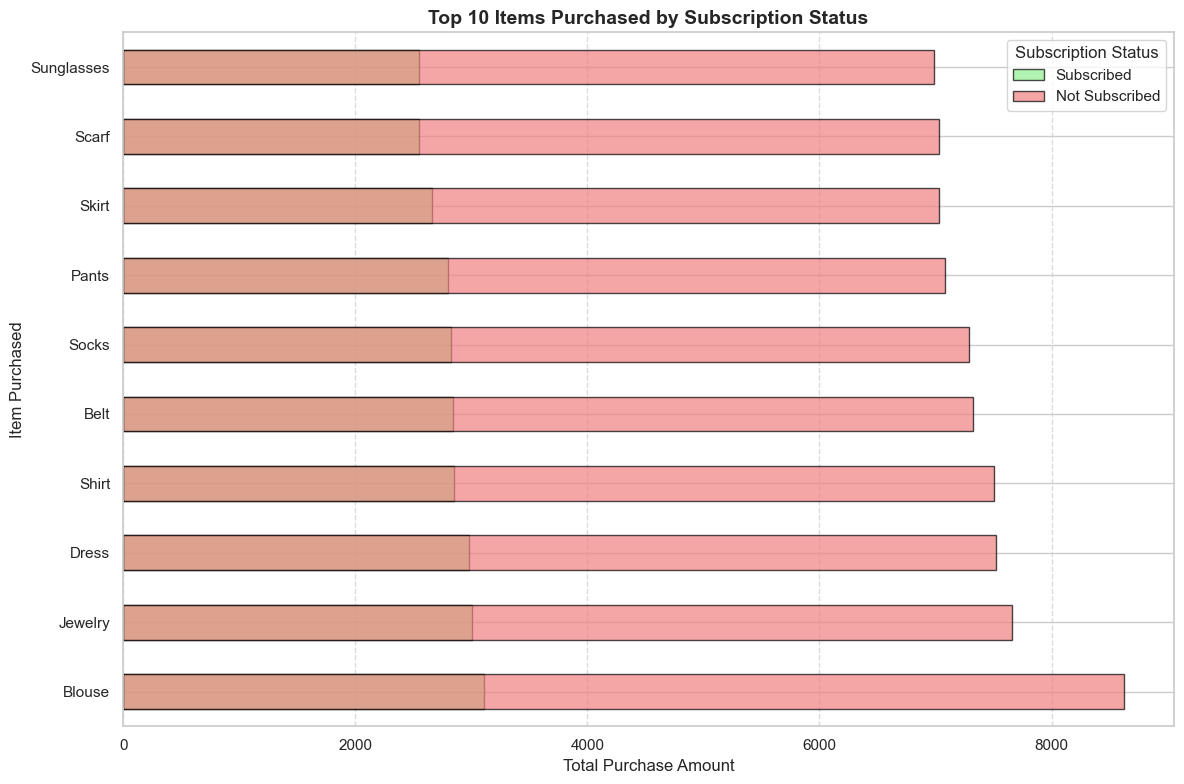

In [478]:
# Top 10 items purchased by subscription status

# Calculate the total purchase amount by Subscription Status and Item Purchased
top_items_subscription = df.groupby(['Subscription Status', 'Item Purchased'])['Purchase Amount (USD)'].sum().unstack()

# Plotting the data for both subscription statuses
plt.figure(figsize=(12, 8))

# For Subscribed customers
top_items_subscription.loc['Yes'].nlargest(10).plot(kind='barh', color='lightgreen', edgecolor='black', label='Subscribed', alpha=0.7)

# For Non-Subscribed customers
top_items_subscription.loc['No'].nlargest(10).plot(kind='barh', color='lightcoral', edgecolor='black', label='Not Subscribed', alpha=0.7)

# Plotting
plt.title('Top 10 Items Purchased by Subscription Status', fontsize=14, weight='bold')
plt.xlabel('Total Purchase Amount', fontsize=12)
plt.ylabel('Item Purchased', fontsize=12)
plt.legend(title='Subscription Status', loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

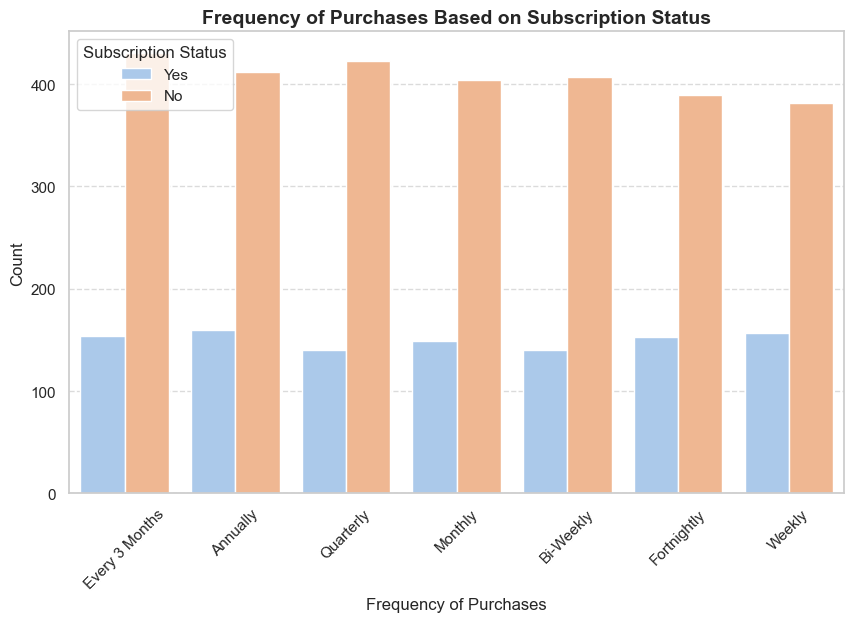

In [482]:
# Frequency of Purchases based on subscription status

# Calculate the counts of each frequency of purchase
frequency_order = df['Frequency of Purchases'].value_counts().index

# Plotting the count of frequency of purchases based on subscription status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Frequency of Purchases', hue='Subscription Status', palette='pastel', order=frequency_order)
plt.title('Frequency of Purchases Based on Subscription Status', fontsize=14, weight='bold')
plt.xlabel('Frequency of Purchases', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

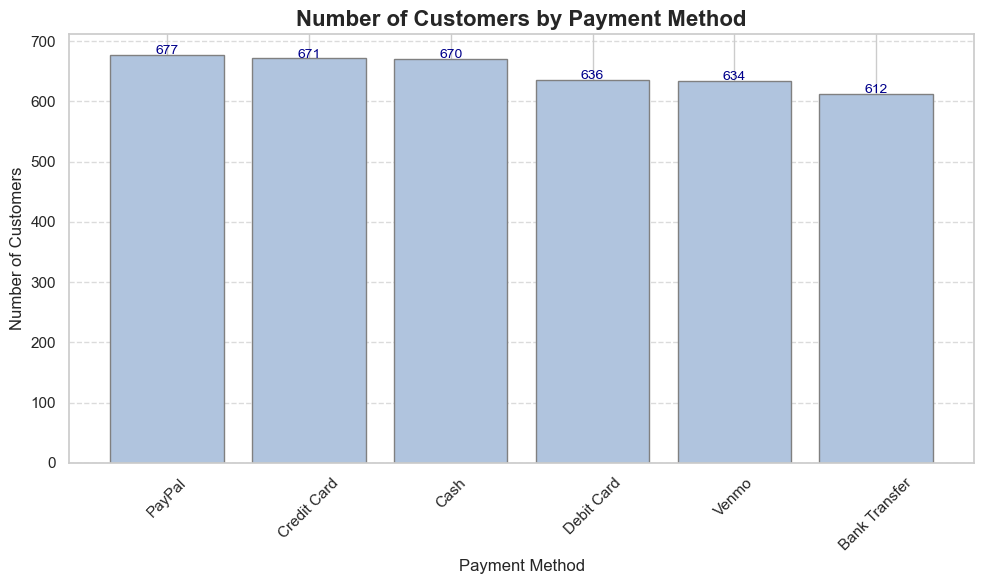

In [559]:
# Number of customers for each payment method

# Count the number of unique customers for each payment method
customers_by_payment_method = df.groupby('Payment Method')['Customer ID'].nunique()

# Sort the data in descending order
customers_by_payment_method_sorted = customers_by_payment_method.sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(customers_by_payment_method_sorted.index, customers_by_payment_method_sorted.values, color='lightsteelblue', edgecolor='gray')

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height), ha='center', fontsize=10, color='darkblue')
plt.title('Number of Customers by Payment Method', fontsize=16, weight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8408\2032883501.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_by_age_group = df.groupby(['Age Group', 'Payment Method']).size().reset_index(name='Count')


<Figure size 1200x800 with 0 Axes>

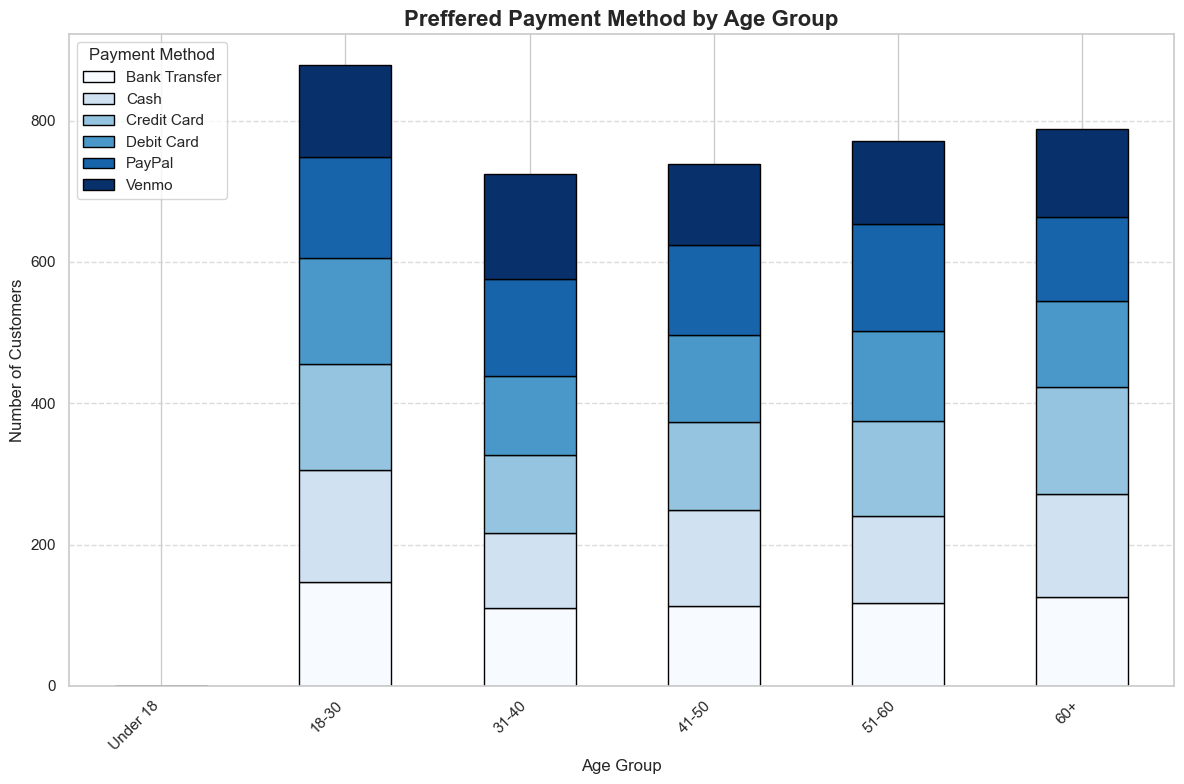

In [500]:
# Payment method preferred by each age group

# Define age groups
bins = [0, 18, 30, 40, 50, 60, 100]  # Age ranges
labels = ['Under 18', '18-30', '31-40', '41-50', '51-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by 'Age Group' and 'Preferred Payment Method' to count occurrences
payment_by_age_group = df.groupby(['Age Group', 'Payment Method']).size().reset_index(name='Count')

# Pivot the data for easier visualization
pivot_payment_by_age_group = payment_by_age_group.pivot(index='Age Group', columns='Payment Method', values='Count').fillna(0)

# Plotting the data
plt.figure(figsize=(12, 8))
pivot_payment_by_age_group.plot(kind='bar', stacked=True, colormap='Blues', figsize=(12, 8), edgecolor='black')
plt.title('Preffered Payment Method by Age Group', fontsize=16, weight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

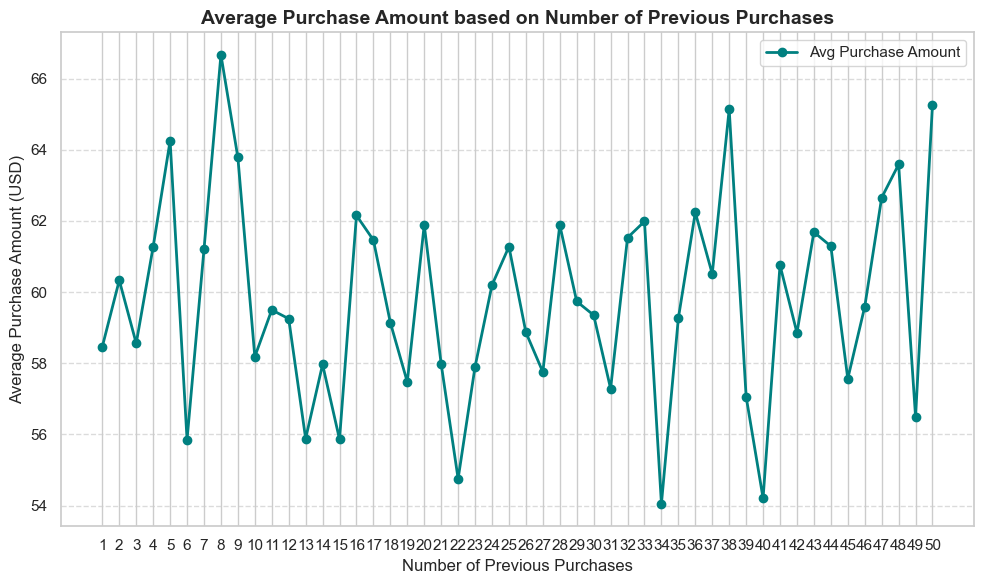

In [544]:
#Average Purchase Amount by Number of Previous Purchases

# Grouping by 'Previous Purchases' and calculating the average purchase amount
avg_purchase_by_previous = df.groupby('Previous Purchases')['Purchase Amount (USD)'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(avg_purchase_by_previous['Previous Purchases'], avg_purchase_by_previous['Purchase Amount (USD)'], 
         marker='o', color='teal', linewidth=2, label='Avg Purchase Amount')
plt.title('Average Purchase Amount based on Number of Previous Purchases', fontsize=14, weight='bold')
plt.xlabel('Number of Previous Purchases', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(avg_purchase_by_previous['Previous Purchases']) 
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8408\1600481455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Shipping Type', data=df, palette='rocket')


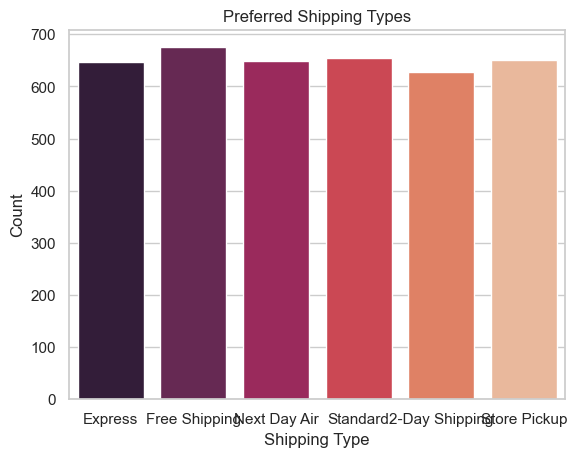

In [510]:
# Shipping type preferences

sns.countplot(x='Shipping Type', data=df, palette='rocket')
plt.title('Preferred Shipping Types')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.show()

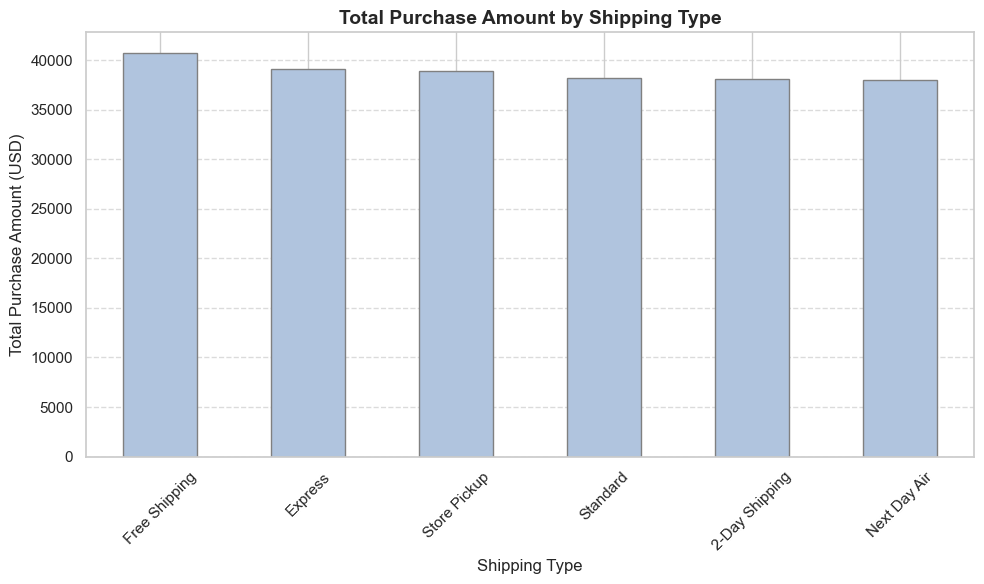

In [504]:
# Total Purchase amount by shipping type

# Group by 'Shipping Type' and calculate the total purchase amount for each shipping type
purchase_by_shipping_type = df.groupby('Shipping Type')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
purchase_by_shipping_type.plot(kind='bar', color='lightsteelblue', edgecolor='gray')

# Adding title and labels
plt.title('Total Purchase Amount by Shipping Type', fontsize=14, weight='bold')
plt.xlabel('Shipping Type', fontsize=12)
plt.ylabel('Total Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

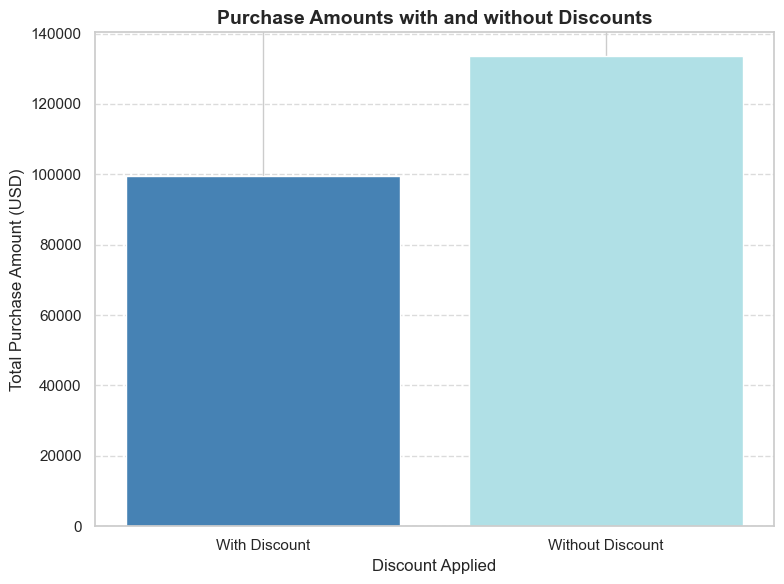

In [506]:
# Purchase amounts with and without discounts

# Group by 'Discount Applied' and calculate the total purchase amount for each group
purchase_with_discount = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)'].sum()
purchase_without_discount = df[df['Discount Applied'] == 'No']['Purchase Amount (USD)'].sum()

# Prepare data for the bar chart
purchase_amount_data = [purchase_with_discount, purchase_without_discount]
labels = ['With Discount', 'Without Discount']

# Plotting the purchase amounts with and without discounts
plt.figure(figsize=(8, 6))
plt.bar(labels, purchase_amount_data, color=['steelblue', 'powderblue'])
plt.title('Purchase Amounts with and without Discounts', fontsize=14, weight='bold')
plt.xlabel('Discount Applied', fontsize=12)
plt.ylabel('Total Purchase Amount (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

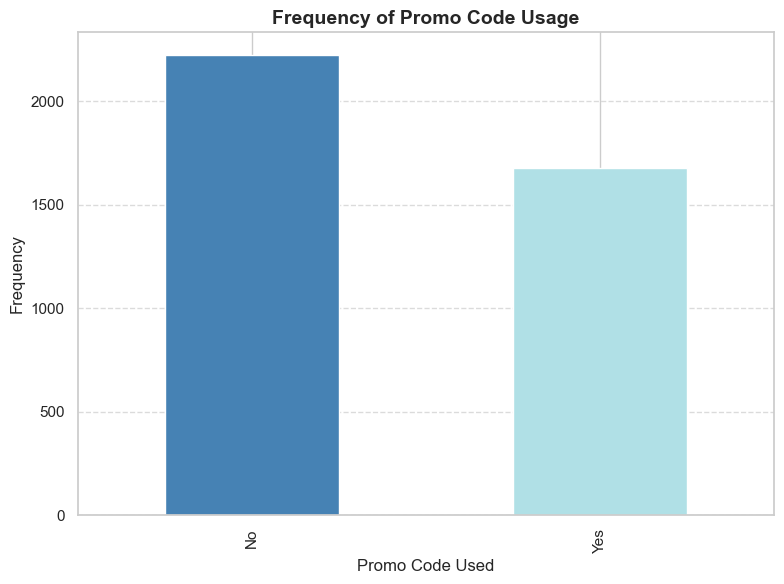

In [384]:
# Calculate the frequency of promo code usage

promo_code_usage = df['Promo Code Used'].value_counts()

# Plotting the bar chart for promo code usage frequency
plt.figure(figsize=(8, 6))
promo_code_usage.plot(kind='bar', color=['steelblue', 'powderblue'])
plt.title('Frequency of Promo Code Usage', fontsize=14, weight='bold')
plt.xlabel('Promo Code Used', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

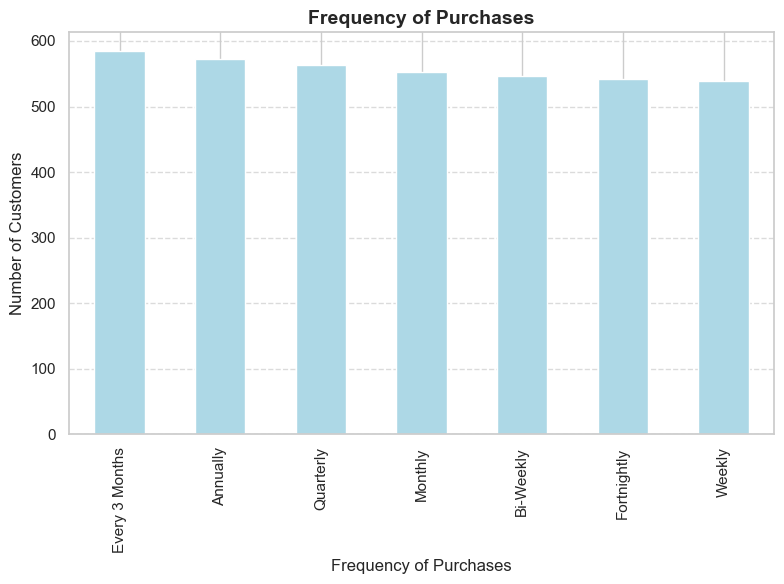

In [508]:
#Frequency of Purchases

# Calculate the frequency of each value in the 'Frequency of Purchases' column and sort in descending order
purchase_frequency = df['Frequency of Purchases'].value_counts().sort_values(ascending=False)

# Plotting the bar chart for purchase frequency counts
plt.figure(figsize=(8, 6))
purchase_frequency.plot(kind='bar', color='lightblue')
plt.title('Frequency of Purchases', fontsize=14, weight='bold')
plt.xlabel('Frequency of Purchases', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()